# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Is The True Normal (Healthy) Human Body Temperature 98.6 deg F?

***Abstract***: *In this iPython Notebook, I am exploring a dataset containing measurements of human body temperatures. I apply various techniques learnt in the inferential statistics lectures like bootstrap replicates measurement and hypothesis testing.  Rest of this notebook walks the reader through the steps and answers the question whether the normal body temperature is really the reported 98.6 deg F.*

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
df = pd.read_csv('data/human_body_temperature.csv')

In [56]:
# Your work here.
print(df.info())

df_stats = df.describe()

df_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [57]:
# Count the number of male and female samples to gain insight into randomness
df.groupby('gender')['temperature'].count()

gender
F    65
M    65
Name: temperature, dtype: int64

(array([ 0.01802885,  0.00600962,  0.        ,  0.02403846,  0.00600962,
         0.03605769,  0.01802885,  0.03605769,  0.03605769,  0.03605769,
         0.078125  ,  0.03004808,  0.06009615,  0.03605769,  0.04807692,
         0.04206731,  0.06009615,  0.06610577,  0.03004808,  0.03004808,
         0.02403846,  0.03004808,  0.01201923,  0.00600962,  0.01201923]),
 array([ 57.  ,  58.28,  59.56,  60.84,  62.12,  63.4 ,  64.68,  65.96,
         67.24,  68.52,  69.8 ,  71.08,  72.36,  73.64,  74.92,  76.2 ,
         77.48,  78.76,  80.04,  81.32,  82.6 ,  83.88,  85.16,  86.44,
         87.72,  89.  ]),
 <a list of 25 Patch objects>)

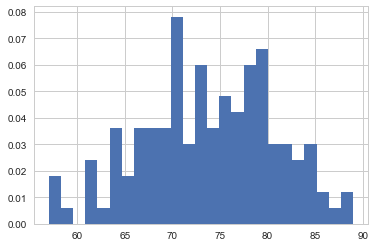

In [58]:
# Examine Box-whisker plot
plt.hist(df['heart_rate'],bins=25,normed=True)

In [59]:
# Measure pearson correlation between temperature and heart rate, in case needed later
r = df['temperature'].corr(df['heart_rate'])
r

0.25365640272076417

In [60]:
sem = df_stats.loc['std','temperature']/np.sqrt(df['temperature'].count())
print("Estimated standard Error of the mean",sem)
t = (df_stats.loc['mean','temperature'] - 98.6) / sem
print("t value",t)

Estimated standard Error of the mean 0.0643044168379
t value -5.45482329236


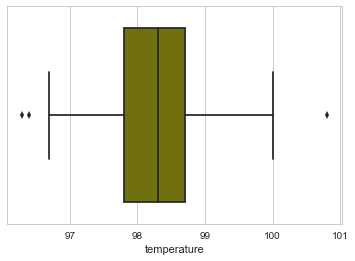

In [61]:
sns.boxplot(df['temperature'],color='olive')

There are only 3 outliers. The boxplot clearly shows skew, as 25 to 50 percentile region is larger than 50 to 75 percentile region

(array([ 0.06837607,  0.1025641 ,  0.25641026,  0.44444444,  0.51282051,
         0.51282051,  0.25641026,  0.01709402,  0.03418803,  0.01709402]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

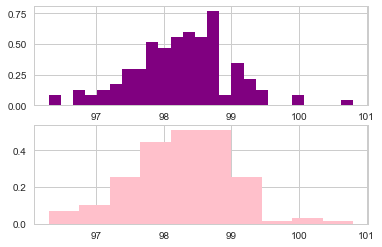

In [62]:
# Examining the temperature data using two different histogram binsizes
plt.subplot(211)
plt.hist(df['temperature'],bins=25,normed=True,color='purple')
plt.subplot(212)
plt.hist(df['temperature'],bins=10,normed=True,color='pink')

The histograms plotted with two different bin sizes show that distribution is unimodal, but they do not appear normal. It is clearly left skewed in the first histogram. Let us also plot ECDF

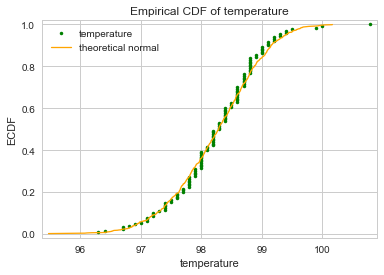

In [63]:
# The function to find x,y for empirical CDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Call the ECDF and compare it with theoretical
x_t,y_t = ecdf(df['temperature'])

plt.plot(x_t,y_t,color='g',marker='.',linestyle='none')

plt.margins(0.02)

norm_th = np.random.normal(df['temperature'].mean(),df['temperature'].std(),size=1000)

x_th,y_th = ecdf(norm_th)

plt.plot(x_th,y_th,color='orange',linewidth=1.3)

plt.xlabel('temperature')

plt.ylabel('ECDF')

plt.title('Empirical CDF of temperature')

plt.legend(['temperature','theoretical normal'])

From the above ECDF plot, distribution of body temperature loosely resembles the theoretical normal distribution (generated with numpy) with the mean and variance equal to those measured from the samples.

In [64]:
# To find the minimum required sample size to carry out the tests:

# Calculate the maximum margin of error
merr = abs(df.temperature.mean()-98.6)

# Z parameter for 99% confidence interval
z_99 = 2.58

# Required n to keep margin of error within merr above
req_n = (z_99*df.temperature.std()/merr)**2

# Display the result
print(round(req_n+0.5))

30


In [65]:
# With sample of size 130, z statistic?
z = abs(df.temperature.mean()-98.6)/(df.temperature.std()/np.sqrt(130))
print(z)

5.45482329236


## 1.Is the distribution of body temperature normal?

**The given sample set is not normally distributed. It is left skewed.**

## 2.Is the sample set large? Are the measurements independent?

a) Large or small in what sense?  If we look at what could have been the size for an experiment for measuring human temperature, then 130 seems small. The original experiment involved 25,000 size. Ref : https://www.health.harvard.edu/press_releases/normal_body_temperature. 

If large/small is wrt accuracy/precision requirements, **sample size is larger than required value of 30 (calculated above)**; hence, central limit theorem can be applied on sampling distributions. 

  b)  **Statistical independence of two temperature T1, T2 means P(T1|T2) = P(T1) and vice versa. There is insufficient information about the dataset to conclude whether measurements are independent.** In the above cells there is numerical and visual EDA results that attempt to get insight from other columns of the dataframe. By observing gender column of the data, we see that there is equal number of males and females, thus there is no gender bias. Also, the heart rate appears bimodally distributed. However, these fail to give conclusive remarks on probability relationship. *We do not know if the data is from people of different races, geographical locations, or those with any medical conditions. In the absence of information such as this, we can not assume that P(T1|T2) = P(T1)* For the sake of going forward we assume they are random and independent.
There is also another way to conclude randomness/independence between the measurements, according to coursera videos. It is because 130 < 10% of population of the world.
   
   
## 3.Is the true population mean temperature 98.6 deg?

**The mean temperature of the sample is measured to be 98.25, which is less than the reported population mean of 98.6.** 

Now this could be just a chance.  To see if this is just a chance or real, we identify the null hypothesis, state alternate hypothesis with respect to an alpha value. Then we find p-value to evaluate whether we should accept or reject null hypothesis.

a) I would use "one sample z-test", as we have one sample consisting of 130 size to do the same. 

H0 : Mean body temperature = 98.6 F 

HA : Mean body temperature =! 98.6 F

Let us fix alpha = 0.01, corresponding to 99% confidence.

   b) We use z statistic because sample size is more than 30. Even though standard deviation information as required by z statistic is not given, since the distribution of sample mean is assumed to be normal by central limit theorem (CLT), we could use z-statistic, assuming sample std to be true std.
It is not clear from course material what are the different types of hypothesis tests, namely one sample, two sample, t and z statistic. Some of it is available here: https://en.wikibooks.org/wiki/Statistics/Testing_Data/t-tests. 
I personally like coursera materials. Hence went through this course videos: https://www.coursera.org/learn/inferential-statistics-intro 
The cell below demonstrates 1 sample z statistic test.

In [80]:
# First step, write a function for bootstrap replicates
import numpy as np
def draw_bs_reps(data, func, size=1,len_d=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates by resampling with replacement
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,len_d))

    return bs_replicates

bs_reps = draw_bs_reps(df['temperature'],np.mean,100000,len(df.temperature))
emp_mean = df.temperature.mean()
# Compute and print p-value: p for two sided
p = np.sum(abs(bs_reps - emp_mean) > (98.6-emp_mean)) / len(bs_reps)
print('p-value =', p)

p-value = 0.0


Since p value is 0 (which means it is very very small), i.e. P(obtaining a mean temperature value equal to 98.25 deg F or less or more than 98.95 deg F from randomly chosen 130 samples if indeed the true population mean temperature was 98.6 deg F) is too small to be observed with trial size of 100000. Anything more takes too long to finish. 

** Hence, we reject the null hypothesis that true population mean temperature is equal to the reported value of 98.6 deg F.**

In [67]:
# Cross checking if we got what we expect:
# Standard Error with temperature measurements sampling measured using the given sample
se_orig = df.temperature.std()/np.sqrt(len(df.temperature))
print("Standard Error in mean measured from given sample =",se_orig)
# Standard deviation of bootstrap replicates, which actually simulate the distribution of mean of sample
print("Standard deviation of bootstrap replicates of sample mean =",bs_reps.std())

Standard Error in mean measured from given sample = 0.0643044168379
Standard deviation of bootstrap replicates of sample mean = 0.0638977350695


As the standard error in mean measured with given measurements and standard deviation of bootstrap replicates are close, we know that the computations are fine.

In [68]:
# Doing the other test, i.e. 1 sample t test
from scipy import stats as st
st.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## 4.Tests with samples with size 10

A one sample t-test needs to be performed with size 10. For sample size 10, it is 9 degrees of freedom. 

In [69]:
st.ttest_1samp(np.random.choice(df.temperature,10),98.6)

Ttest_1sampResult(statistic=-2.5354627641855476, pvalue=0.031947732703496649)

I see that for various runs I get different p values, but mostly larger than 0.01. Hence with the t test of randomly chosen 10 samples, the result is inconclusive. 
**We don't have enough evidence to reject null hypothesis**

In [70]:
z_n_10 = abs(df.temperature.mean()-98.6)/df.temperature.std()/np.sqrt(10)
print("z statistic with sample size 10",z_n_10)
bs_reps1 = draw_bs_reps(df['temperature'],np.mean,10000,10)
emp_mean = 98.6
# Compute and print p-value: p
p = np.sum(abs(bs_reps1 - emp_mean) > (98.6 - df.temperature.mean())) / len(bs_reps1)
print('p-value =', p)

z statistic with sample size 10 0.151289577532
p-value = 0.4968


Even here I get different p values for different runs. But I get p-value larger than 0.01 around 0.5. Hence there is not sufficient evidence to reject null hypothesis.
**Conclusion for question 4 are,
a) For small sample size 10, z statistic gives more consistent p-value than t statistic test.
b) Sample size 10 is not large enough for central limit theorem to hold, hence using z statistic is wrong**

## 5.What temperature is someone's body temperature abnormal?

We will find the answers by evaluating 99% and 95% confidence intervals.

In [71]:
ci_99 = np.percentile(bs_reps,[0.5,99.5])
print('99% confidence interval of the mean:',ci_99)
ci_95 = np.percentile(bs_reps,[2.5,97.5])
print('95% confidence interval of the mean:',ci_95)

99% confidence interval of the mean: [ 98.08461154  98.41538462]
95% confidence interval of the mean: [ 98.12538462  98.37384615]


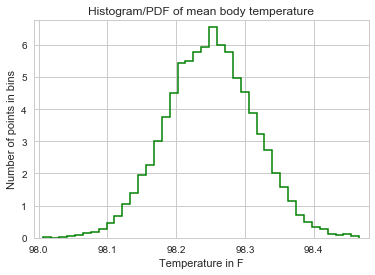

In [72]:
_ = plt.hist(bs_reps,bins=40,histtype='step',color='g',normed=True,linewidth=1.5)
_ = plt.xlabel('Temperature in F')
_ = plt.ylabel('Number of points in bins')
_ = plt.margins(0.03)
_ = plt.title('Histogram/PDF of mean body temperature')

Taking the numbers from 99% confidence interval (that are less stringent than 95%), we can consider body temperature to be abnormal, if it falls below ci_99[0] F or goes above ci_99[1] F above. Note that the originally reported value of 98.6 F lies to the right of 99% confidence interval! ** We infer that 99% of the randomly taken samples of size 130 from the real population will yield a mean value in the interval, 98.083 F - 98.417 F, i.e 98.25 +/ 0.167 F**

*Note: The number 0.167 is very close to 2.58 x 0.0643, which is, z parameter at 99% x standard error, not a coincidence*

## 6.Analysing Male and Female mean body temperature differences

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64
count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
z score with sigma taken from ladies population = 25.286226882596655
z score with sigma taken from men population = 26.90496596035274


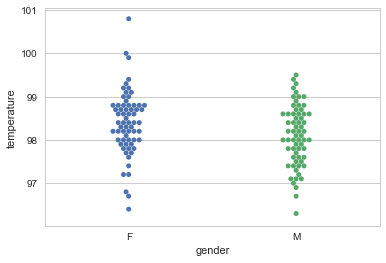

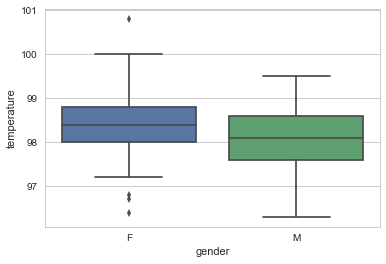

In [83]:
# Quickly do numerical and visual EDA first
ladies = df.loc[df.gender == 'F']['temperature']
men = df.loc[df.gender == 'M']['temperature']
print(ladies.describe())
print(men.describe())
_ = sns.swarmplot(x='gender',y='temperature',data=df)
plt.figure()
_ = sns.boxplot(x='gender',y='temperature',data=df)
z_sc1 = (ladies.mean() - men.mean())/(ladies.std()/len(ladies))
print("z score with sigma taken from ladies population =",z_sc1)
z_sc2 =  (ladies.mean() - men.mean())/(men.std()/len(men))
print("z score with sigma taken from men population =",z_sc2)

By looking at the numerical values, difference in means and standard deviations cannot be ignored. Also from beeswarm plot, spread in the Female population is more than that of males. There are several theoretical possibilities here:

1) They are from different distributions, shifted by mean and difference in std was purely by chance

2) They are from different distributions, shift in std was genuine, mean was by chance

3) They are from different distributions, and both mean and std are different due to this.

4) They are from identical distributions, and both differences are by chance!

#### Two sample hypothesis testing 
H0: Ladies and Men samples are exact, with same distribution and parameters

H1: They are not exact same distributions.

Alpha = 0.01

In [74]:
def diff_means(d1,d2):
    return np.mean(d1) - np.mean(d2)

In [75]:
# We will conduct both permutation test and bootstrap test
# Let us set ground for permutation test first:
def permutation_sample(d1,d2):
    permuted_data = np.random.permutation(np.concatenate((d1, d2)))
    return permuted_data[:len(d1)],permuted_data[len(d1):]

In [76]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

p-value = 0.0113


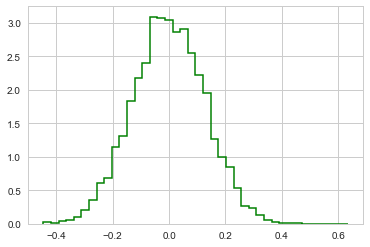

In [81]:
emp_diff_means = diff_means(ladies,men)
perm_reps = draw_perm_reps(ladies,men,diff_means,size=10000)
# Compute and print p-value for the hypothesis 
p = np.sum(perm_reps >= emp_diff_means )/ len(perm_reps)
print('p-value =', p)    
_ = plt.hist(perm_reps ,bins=40,histtype='step',color='g',normed=True,linewidth=1.5)

Since p value is more than 0.01 (sometimes it is in border), the difference is not statistically significant.
**There is not enough evidence to reject null hypothesis**

#### Two sample hypothesis testing 
H0: They come from same distributions

H1: They come from different distributions.

Alpha = 0.01

p-value = 0.3937


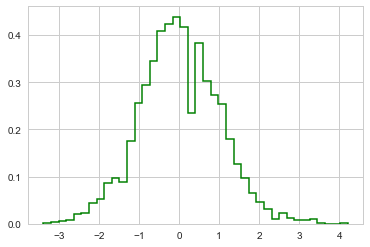

In [78]:
# Method 2: Shifting the means and computing
# We shift the mean of both to the combined mean.
ladies_shifted = ladies - np.mean(ladies) + df.temperature.mean()
men_shifted = men - np.mean(men) + df.temperature.mean()


# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_l = draw_bs_reps(ladies_shifted, np.mean, 10000)
bs_reps_m = draw_bs_reps(men_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_reps_d = bs_reps_l - bs_reps_m

# Compute and print p-value: p
p = np.sum(bs_reps_d >= emp_diff_means) / len(bs_reps_d)
print('p-value =', p)
_ = plt.hist(bs_reps_d ,bins=40,histtype='step',color='g',normed=True,linewidth=1.5)

Since p-value is larger than 0.01, we conclude that the difference is statistically insignificant. **With the given data and the tests done, there is not enough evidence to conclude "Mean temperature of female body more than that of males"**

**Conclusion for question 6: Given the dataset and observed variations of population parameters between males and females, we have got astonishing result that it could happen purely by chance.** Possible explanation is, the two temperature tuples (ladies, men) = (98.394, 98.109) = (98.25+0.144, 98.25-0.141), the readings are symmetric around the observed overall mean.

Note: The z score came out to be of the order of 25. With this high z score, the null hypothesis will not hold true. Not sure what went wrong by following datacamp tutorials